C:\Users\kandp\AppData\Local\Temp\ipykernel_43412\812141307.py:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_clean['created_at'] = pd.to_datetime(df_clean['created_at'], errors='coerce')
C:\Users\kandp\AppData\Local\Temp\ipykernel_43412\812141307.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['created_at'] = pd.to_datetime(df_clean['created_at'], errors='coerce')
C:\Users\kandp\AppData\Local\Temp\ipykernel_43412\812141307.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

EDA plots generated.


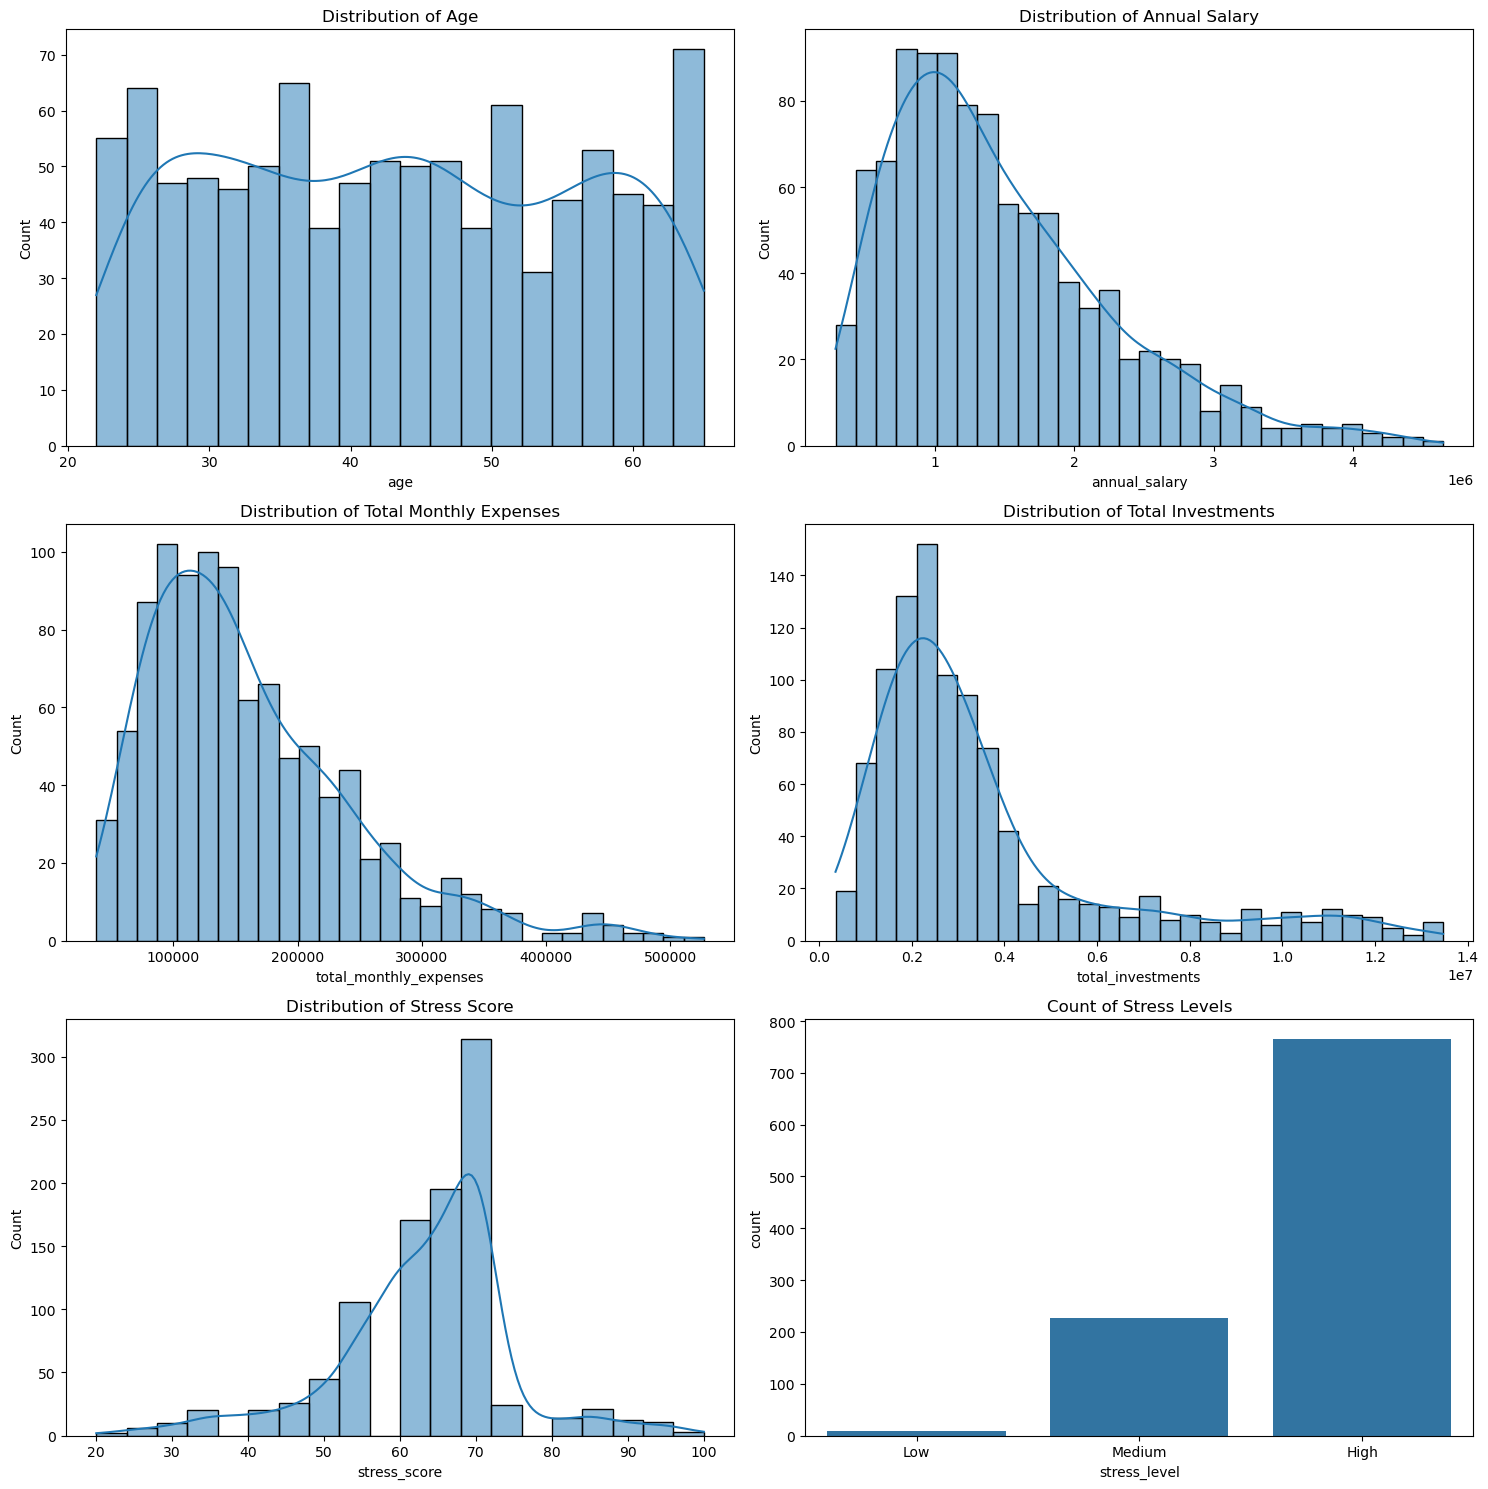

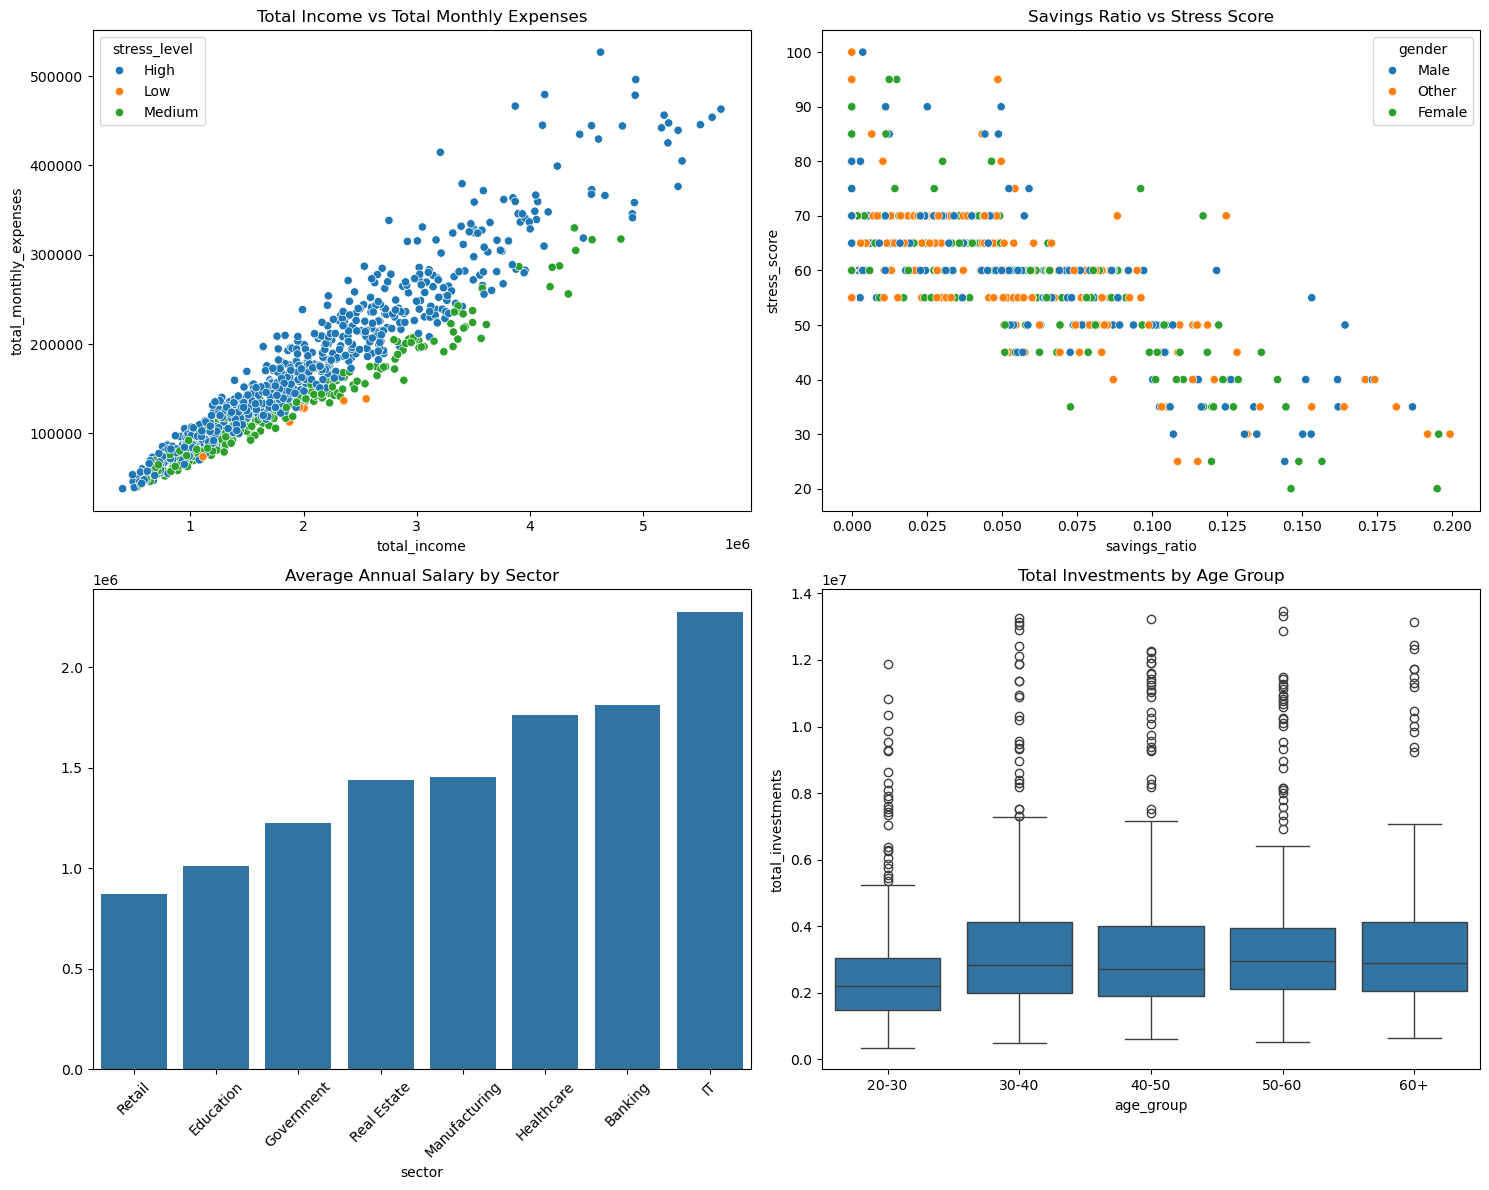

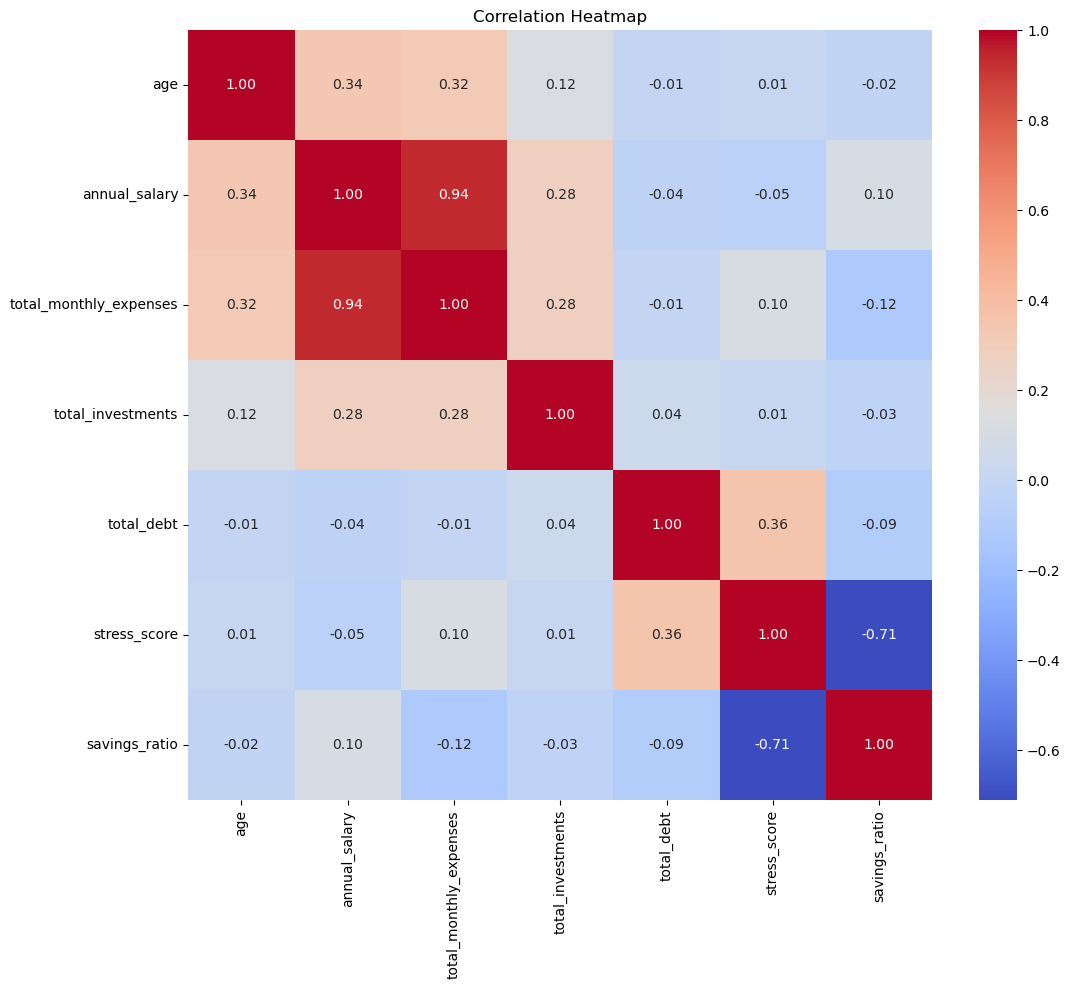

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# 1. Data Cleaning
# Remove 'Unnamed' columns
df=pd.read_csv("combined_dataset.csv")
df_clean = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Convert created_at to datetime (handling potential errors)
df_clean['created_at'] = pd.to_datetime(df_clean['created_at'], errors='coerce')


# 3. Bivariate Analysis
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 12))

# Income vs Expenses
sns.scatterplot(x='total_income', y='total_monthly_expenses', data=df_clean, hue='stress_level', ax=axes2[0, 0])
axes2[0, 0].set_title('Total Income vs Total Monthly Expenses')

# Stress Score vs Savings Ratio
sns.scatterplot(x='savings_ratio', y='stress_score', data=df_clean, hue='gender', ax=axes2[0, 1])
axes2[0, 1].set_title('Savings Ratio vs Stress Score')

# Average Salary by Sector
avg_salary_sector = df_clean.groupby('sector')['annual_salary'].mean().sort_values()
sns.barplot(x=avg_salary_sector.index, y=avg_salary_sector.values, ax=axes2[1, 0])
axes2[1, 0].tick_params(axis='x', rotation=45)
axes2[1, 0].set_title('Average Annual Salary by Sector')

# Investments by Age Group
df_clean['age_group'] = pd.cut(df_clean['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60+'])
sns.boxplot(x='age_group', y='total_investments', data=df_clean, ax=axes2[1, 1])
axes2[1, 1].set_title('Total Investments by Age Group')

plt.tight_layout()
plt.savefig('bivariate_analysis.png')

# 4. Correlation Heatmap
plt.figure(figsize=(12, 10))
corr_cols = ['age', 'annual_salary', 'total_monthly_expenses', 'total_investments', 'total_debt', 'stress_score', 'savings_ratio']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')

print("EDA plots generated.")

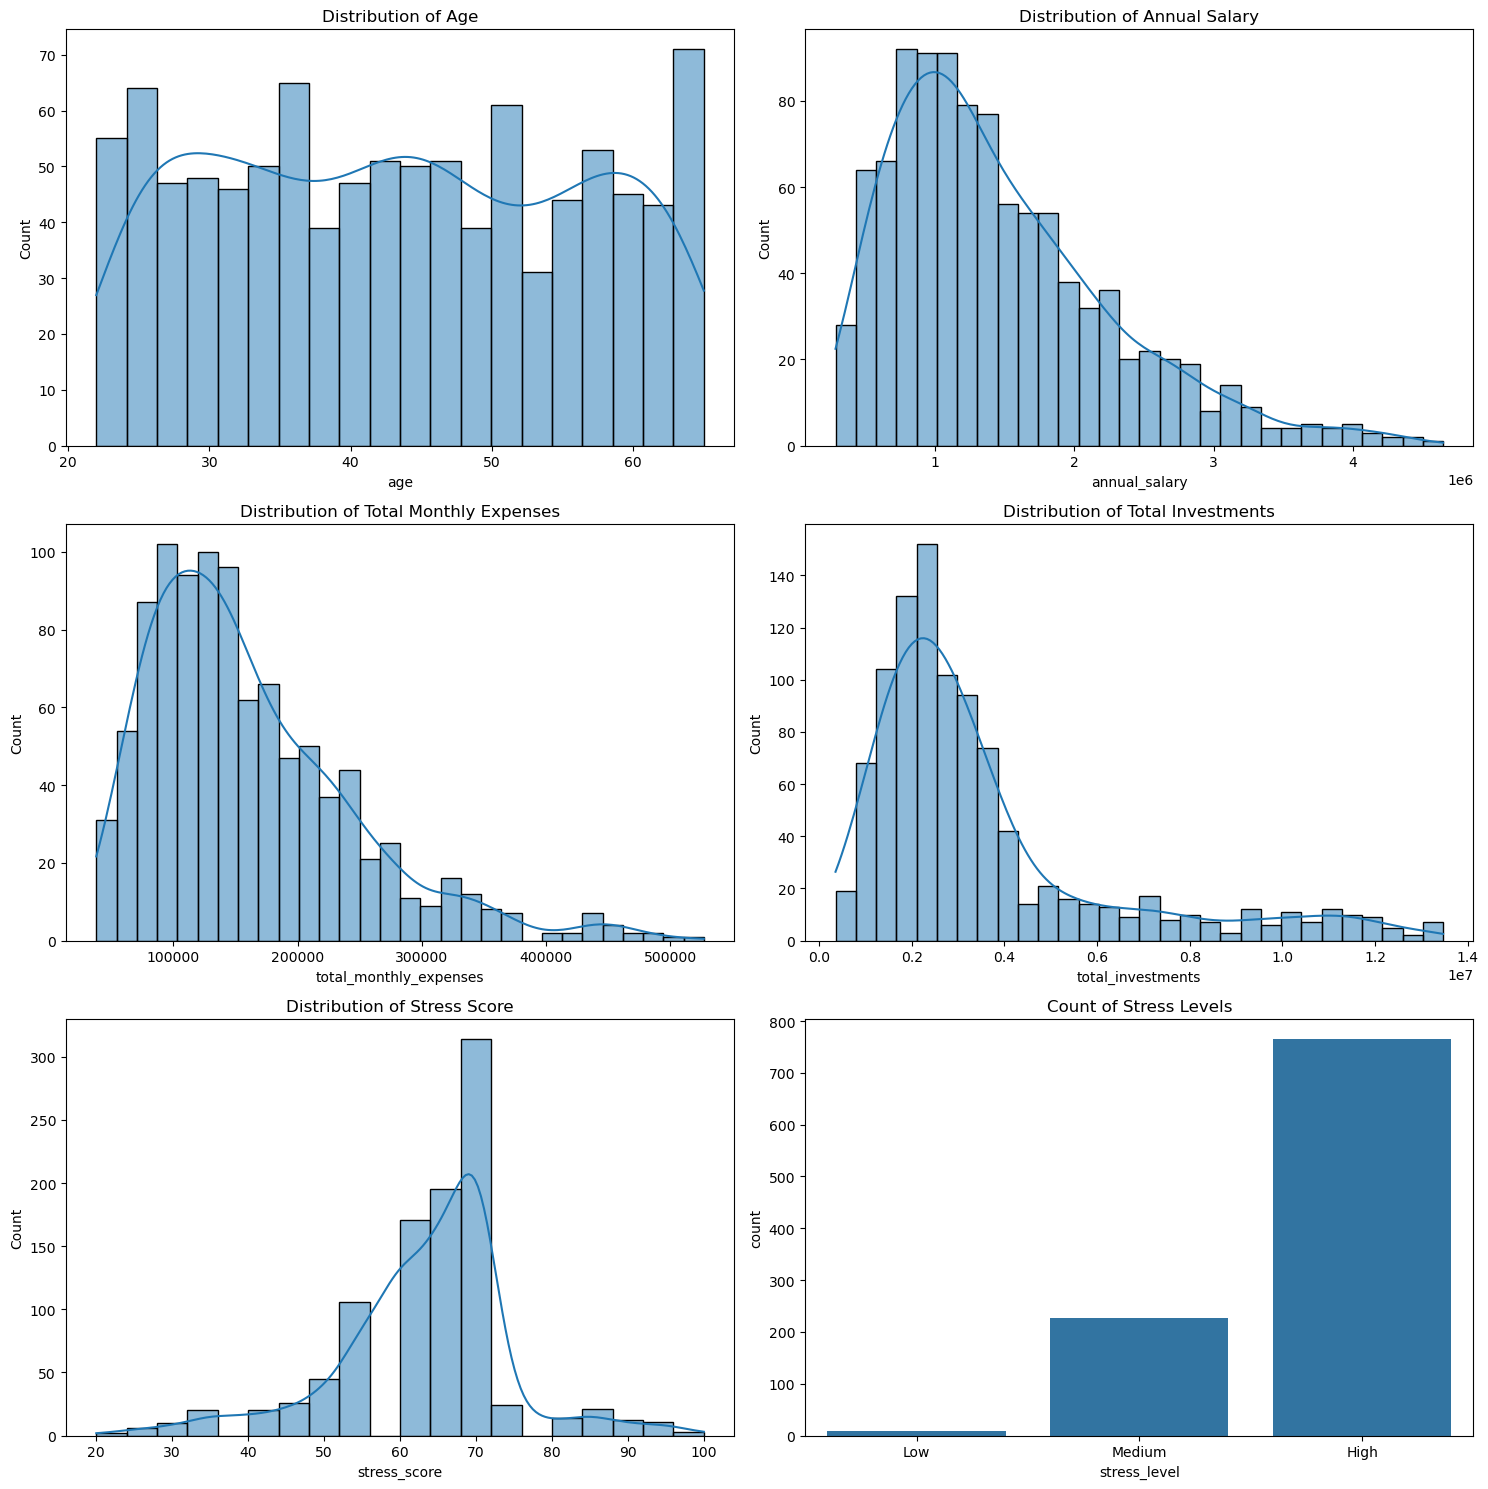

In [4]:
# 2. Univariate Analysis
# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
# Plot distributions
sns.histplot(df_clean['age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

sns.histplot(df_clean['annual_salary'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Annual Salary')

sns.histplot(df_clean['total_monthly_expenses'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Total Monthly Expenses')

sns.histplot(df_clean['total_investments'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Total Investments')

sns.histplot(df_clean['stress_score'], bins=20, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Stress Score')

sns.countplot(x='stress_level', data=df_clean, ax=axes[2, 1], order=['Low', 'Medium', 'High'])
axes[2, 1].set_title('Count of Stress Levels')

plt.tight_layout()
plt.savefig('univariate_analysis.png')


C:\Users\kandp\AppData\Local\Temp\ipykernel_43412\1161281913.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_group'] = pd.cut(df_clean['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60+'])


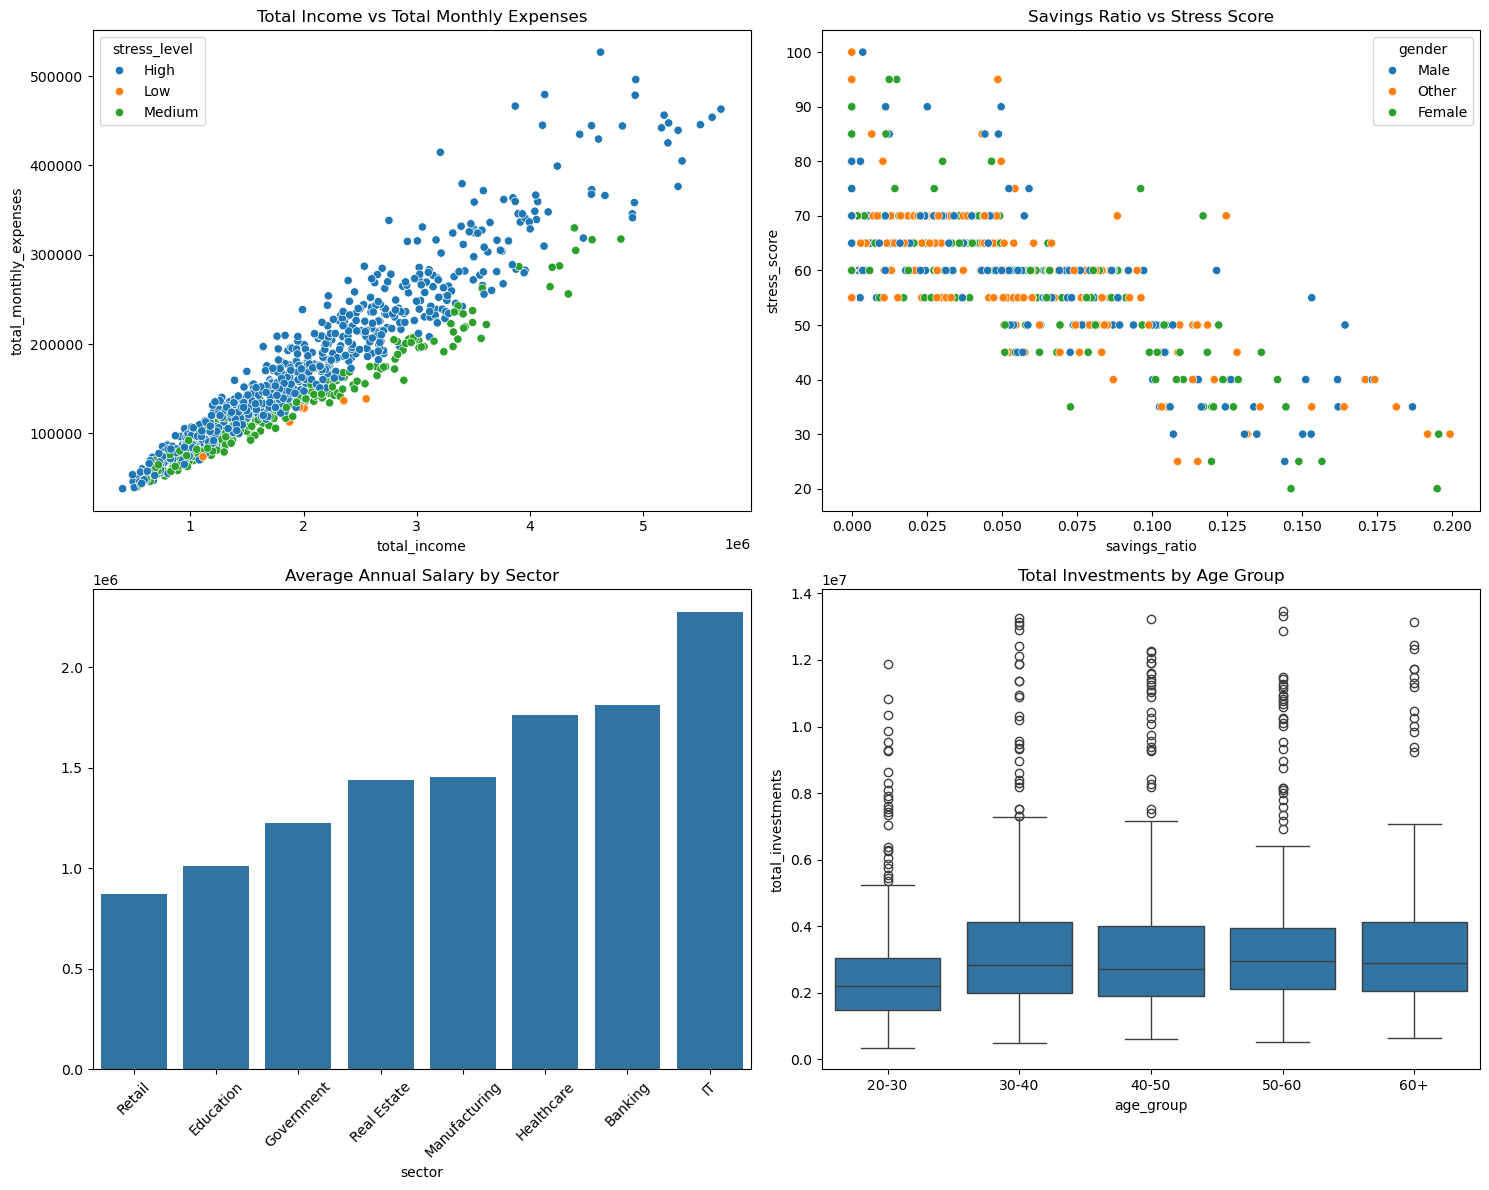

In [5]:
# 3. Bivariate Analysis
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 12))

# Income vs Expenses
sns.scatterplot(x='total_income', y='total_monthly_expenses', data=df_clean, hue='stress_level', ax=axes2[0, 0])
axes2[0, 0].set_title('Total Income vs Total Monthly Expenses')

# Stress Score vs Savings Ratio
sns.scatterplot(x='savings_ratio', y='stress_score', data=df_clean, hue='gender', ax=axes2[0, 1])
axes2[0, 1].set_title('Savings Ratio vs Stress Score')

# Average Salary by Sector
avg_salary_sector = df_clean.groupby('sector')['annual_salary'].mean().sort_values()
sns.barplot(x=avg_salary_sector.index, y=avg_salary_sector.values, ax=axes2[1, 0])
axes2[1, 0].tick_params(axis='x', rotation=45)
axes2[1, 0].set_title('Average Annual Salary by Sector')

# Investments by Age Group
df_clean['age_group'] = pd.cut(df_clean['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60+'])
sns.boxplot(x='age_group', y='total_investments', data=df_clean, ax=axes2[1, 1])
axes2[1, 1].set_title('Total Investments by Age Group')

plt.tight_layout()
plt.savefig('bivariate_analysis.png')


EDA plots generated.


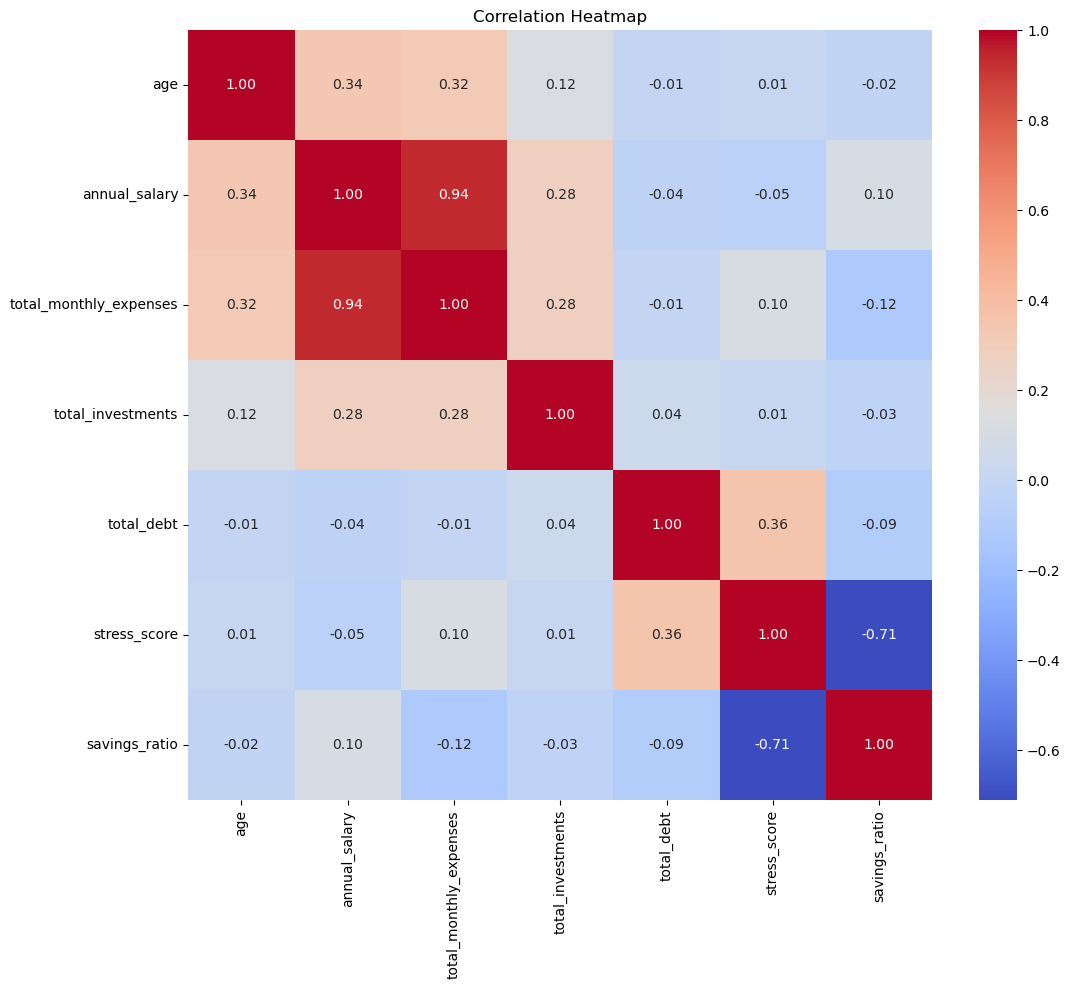

In [6]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 10))
corr_cols = ['age', 'annual_salary', 'total_monthly_expenses', 'total_investments', 'total_debt', 'stress_score', 'savings_ratio']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')

print("EDA plots generated.")